Customer Churn Prediction

In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



In [254]:

data = pd.read_csv('data set/bigml_59c28831336c6604c800002a.csv')

data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## DATA UNDERSTANDING.

Sourced from Kaggle (Churn in Telecom's dataset) and consists of 3333 rows and 21 columns. It provides comprehensive information on customer attributes and behaviors within the telecommunications domain, enabling analysis and prediction of churn patterns.
They consist of the folowing columns:


In [255]:
# Get a brief overview using .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [256]:
# Get statistical description of the data using .describe()
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [257]:
#Get the value counts of the target variable using .value_counts()
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [258]:
# View the Unique Values using .nunique()
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [259]:
# Preview the top of the dataset
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [260]:
data.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


a) Checking for missing values

In [261]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing values count for each column:")
print(missing_values)

# Check if there are any missing values in the DataFrame
if missing_values.sum() == 0:
    print("No missing values found.")
else:
    print("There are missing values in the dataset.")

Missing values count for each column:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64
No missing values found.


In [262]:
# Checking duplicated rows
data.duplicated().sum()


0

In [263]:
# Checking for duplicate in phone number
duplicates_numbers = data.duplicated(subset ='phone number')
duplicates_numbers.unique()

array([False])

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

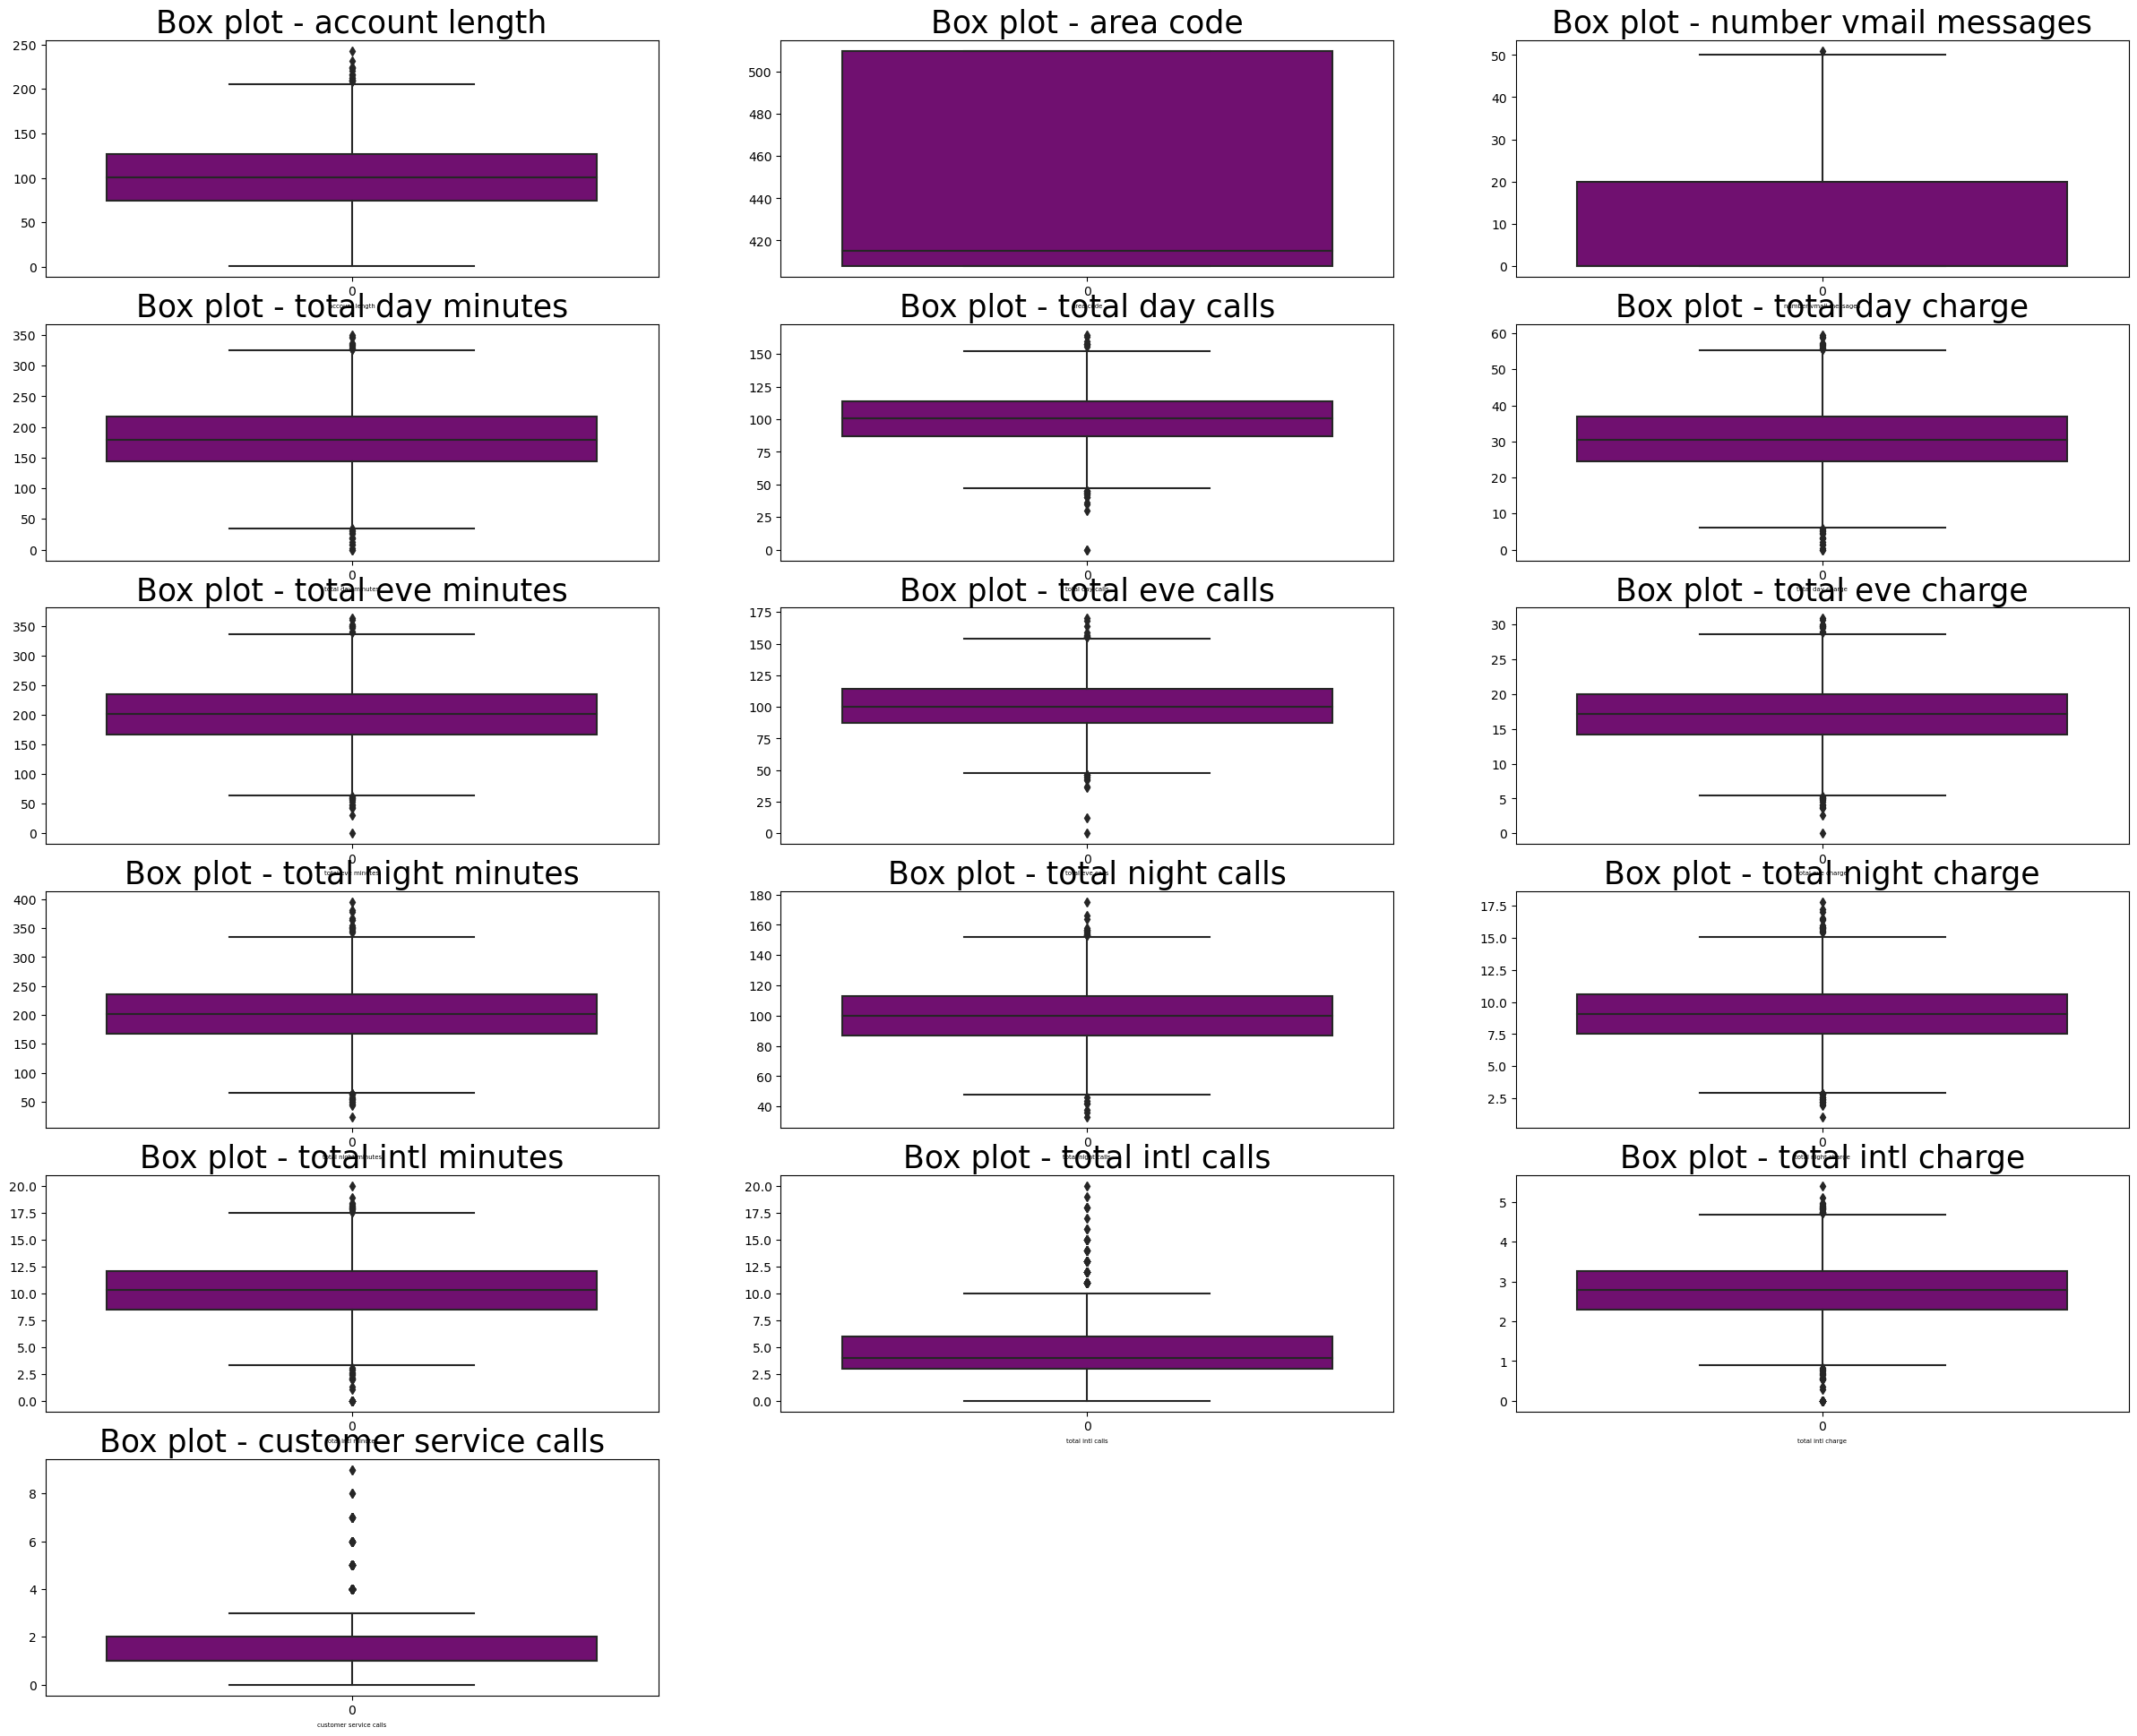

In [264]:
# Creating a list of columns with numeric values
numeric_cols = data.select_dtypes('number').columns

# Calculate the number of rows and columns for subplots
num_rows = (len(numeric_cols) - 1) // 3 + 1
num_cols = min(len(numeric_cols), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each numeric column
for i, column in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data[column], ax=axes[row, col], color='purple')
    axes[row, col].set_title(f'Box plot - {column}', fontsize=25)
    axes[row, col].set_xlabel(column, fontsize=5)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout

In [265]:
# Checking for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = data[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

Conversion of data types

In [266]:

# Checking data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = data[columns].dtypes
print(column_data_types)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


In [267]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
data["churn"] = data["churn"].astype(int)
print(data["churn"].dtype)

int32


In [268]:
# Convert "State" column to categorical data type
data["area code"] = data["area code"].astype("str")
print(data["area code"].dtype)


object


Dropping of columns


In [269]:
# Drop the 'phone number' column
data.drop(columns=['phone number'], inplace=True)

 The sales and marketing department will not need to include phone numbers in their sales stategy or ad campaigns.

## Exploratory Data Analysis

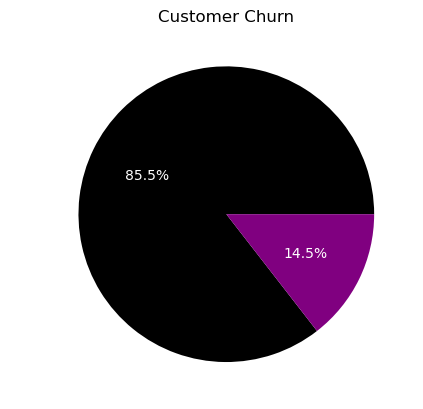

In [270]:
#Univariate analysis of the dataset
churn_counts = data['churn'].value_counts()

plt.pie(x=churn_counts, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', colors=['black', 'purple'], textprops={'color': 'white'})
plt.title('Customer Churn')
plt.show()

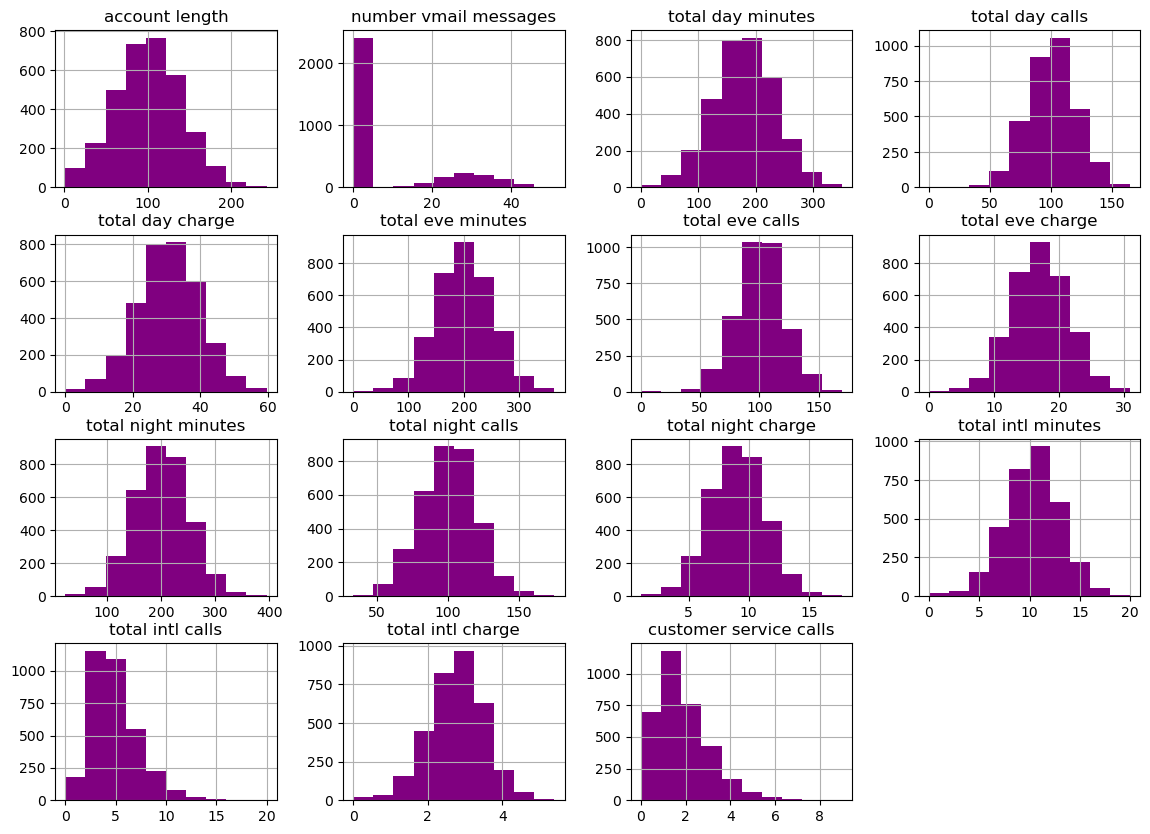

In [271]:
# distribution of features
data.drop(columns='churn').hist(figsize=(14,10), color='purple');


In [272]:
# Find the top states with highest churn rate
top10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).head(5)
top10 = pd.DataFrame(top10)
top10.head()

,Percentage Churn
state,
NJ,26.470588
CA,26.470588
TX,25.000000
MD,24.285714
SC,23.333333


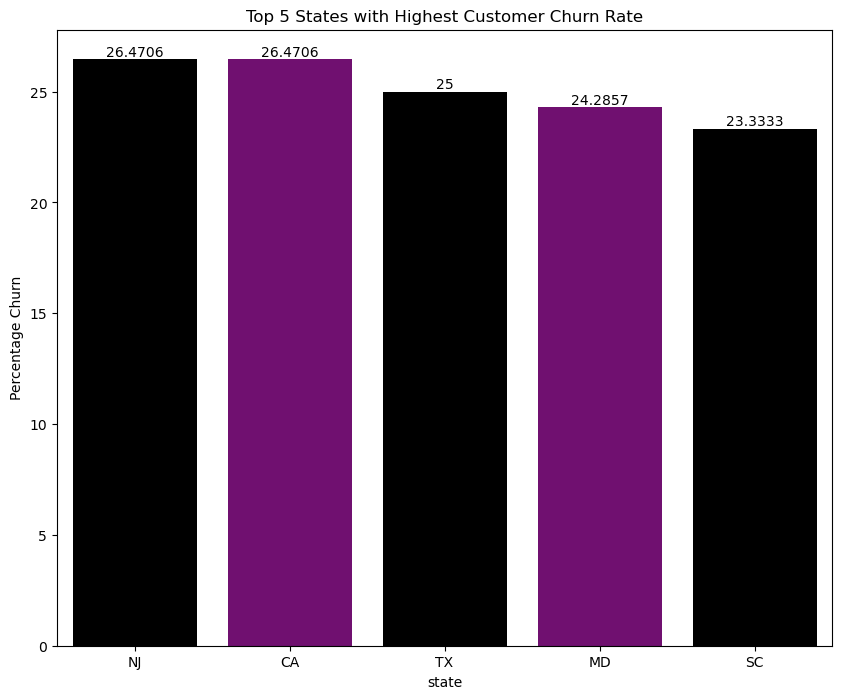

In [273]:
# Define custom colors
custom_palette = ['black', 'purple']

# Visulaize the top 10 States with Customer Churn
plt.figure(figsize=(10,8))
ax = sns.barplot(x=top10.index, y='Percentage Churn', data=top10, palette=custom_palette)
plt.title("Top 5 States with Highest Customer Churn Rate")

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [274]:
#Find States with lowest customer churn using .tail()
bottom10 = churn_rate_data.sort_values(by='Percentage Churn', ascending=False).tail(5)
bottom10 = pd.DataFrame(bottom10)
bottom10['Percentage Churn'] = bottom10['Percentage Churn'] 
bottom10.head()

,Percentage Churn
state,
IA,6.818182
VA,6.493506
AZ,6.250000
AK,5.769231
HI,5.660377


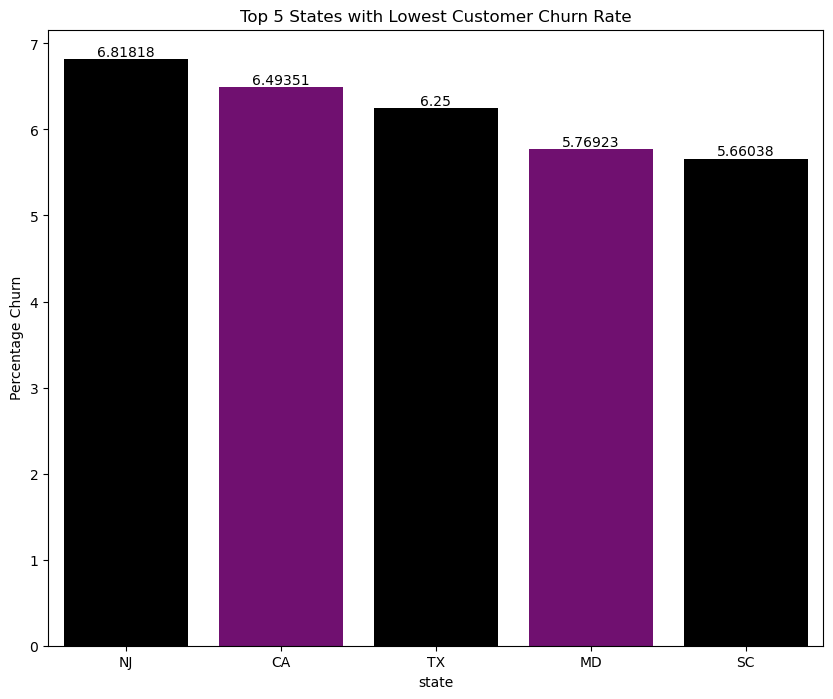

In [275]:
# Define custom colors
custom_palette = ['black', 'purple']

# Visualize the outcome using sns.barplot
plt.figure(figsize=(10,8))
sns.barplot(x=top10.index, y='Percentage Churn', data=bottom10, palette=custom_palette)
plt.title("Top 5 States with Lowest Customer Churn Rate")

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container)

plt.show()


## Bivariate Analysis

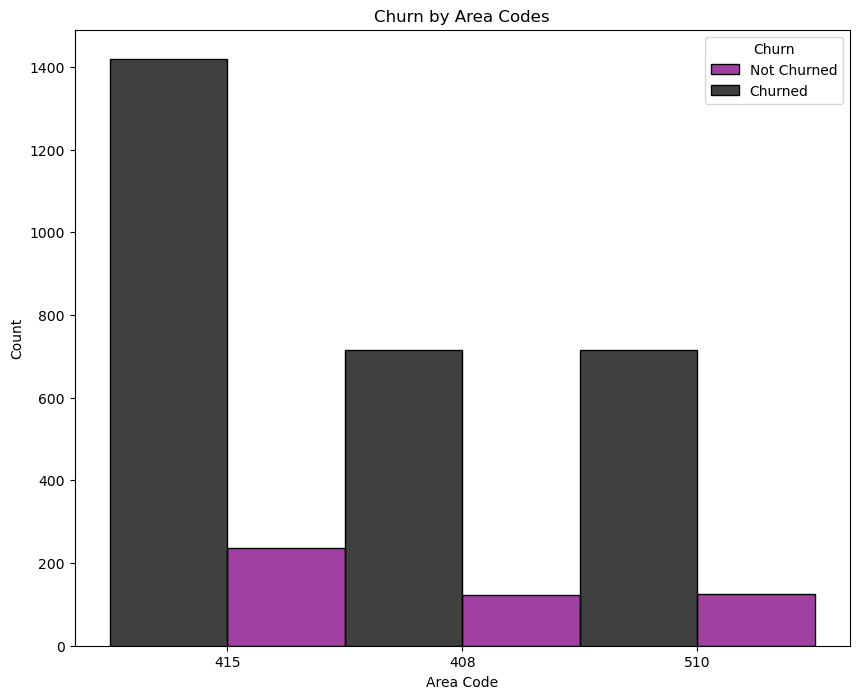

In [276]:
# Churn by area codes
plt.figure(figsize=(10, 8))
sns.histplot(data=data, x='area code', hue='churn', multiple='dodge', palette=['black', 'purple'])

# Adding a legend with custom labels
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])

# Adjusting labels
plt.xlabel('Area Code')
plt.ylabel('Count')

# Adding a title
plt.title('Churn by Area Codes')

# Show the plot
plt.show()


Area code 415 represented as 1 has the highest retention rate compared to the rest

What is the relationship between various continuous features in the telecom churn dataset and how do they contribute to the prediction of churn?

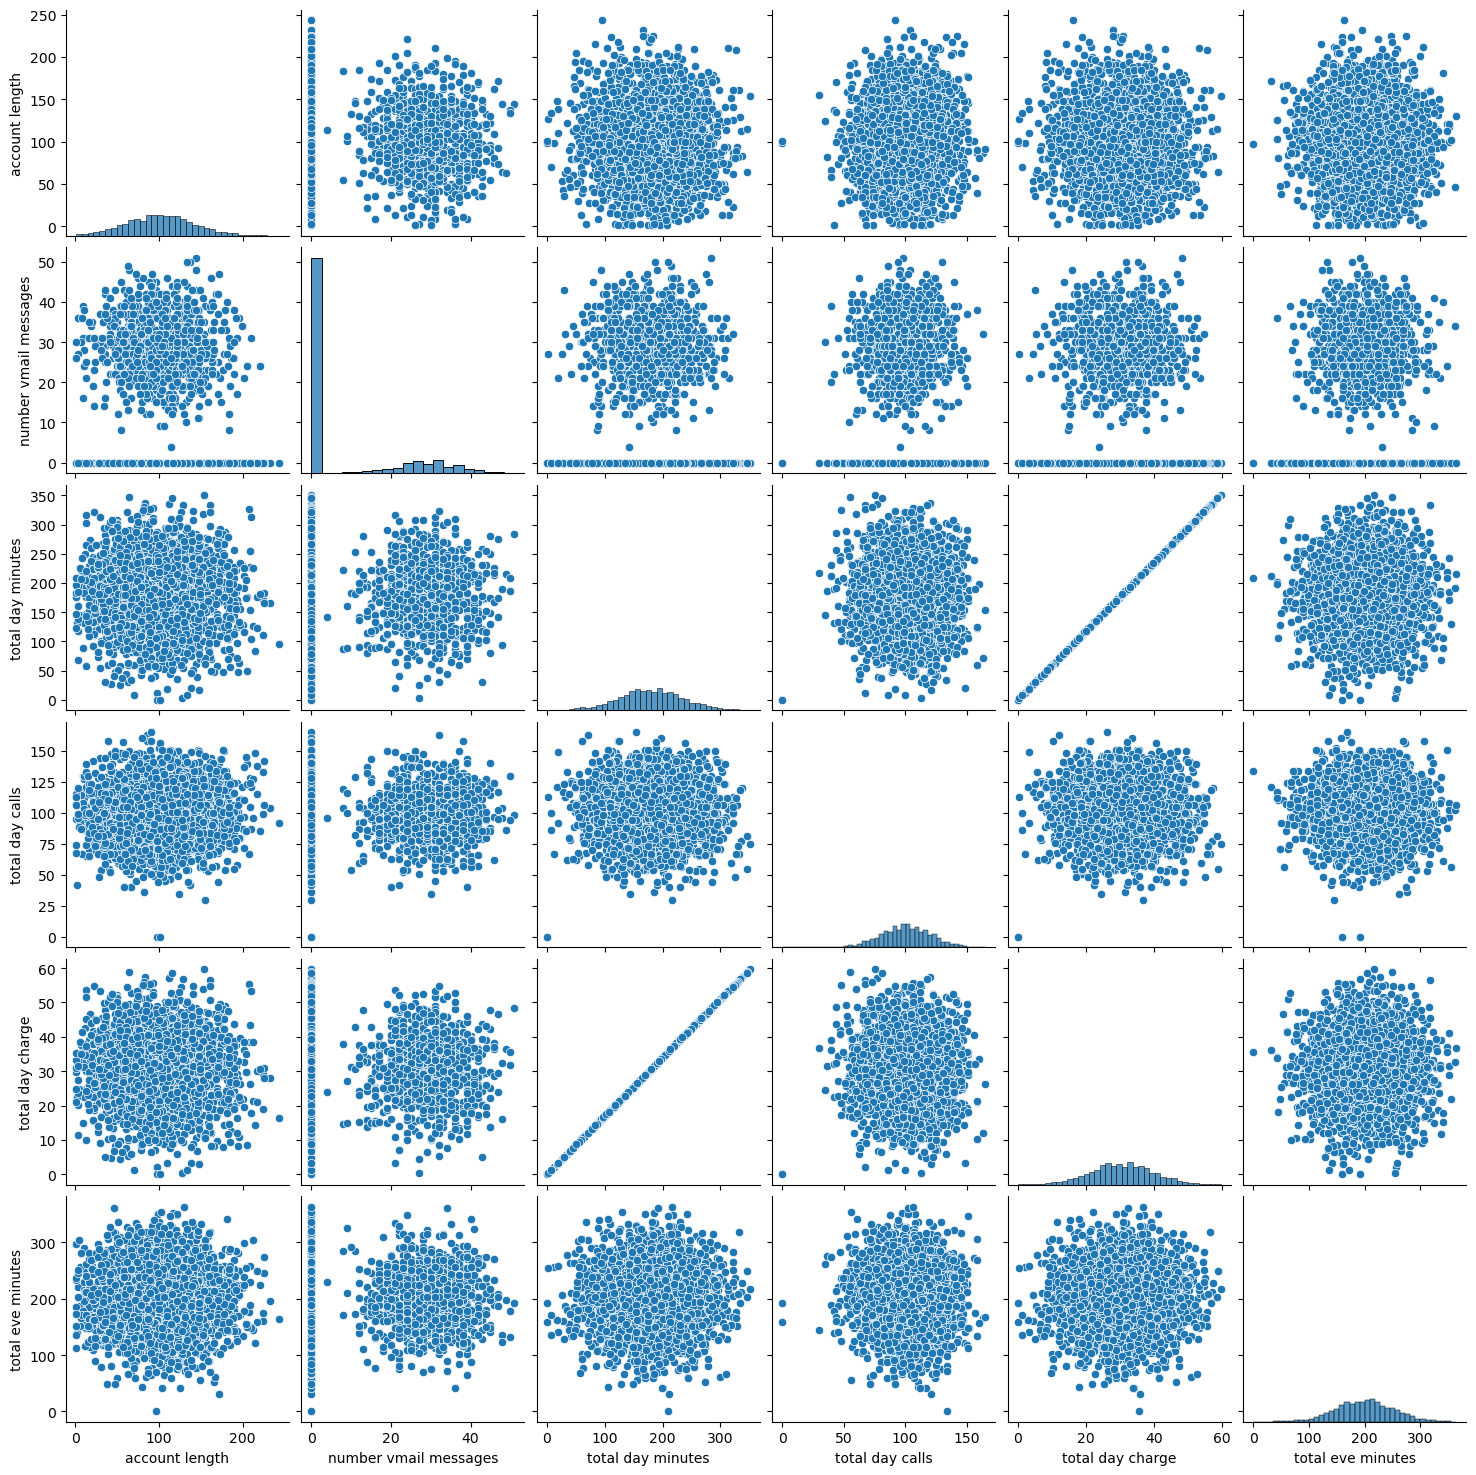

In [277]:
continous_cols = ['account length','number vmail messages','total day minutes',
                 'total day calls','total day charge','total eve minutes',
                  'total night minutes','total night charge','total intl minutes',
                  'total intl charge','customer service calls','churn']

# Plot pairwise relationships in a dataset
sns.pairplot(data=data[continous_cols[0:6]], palette='purple');

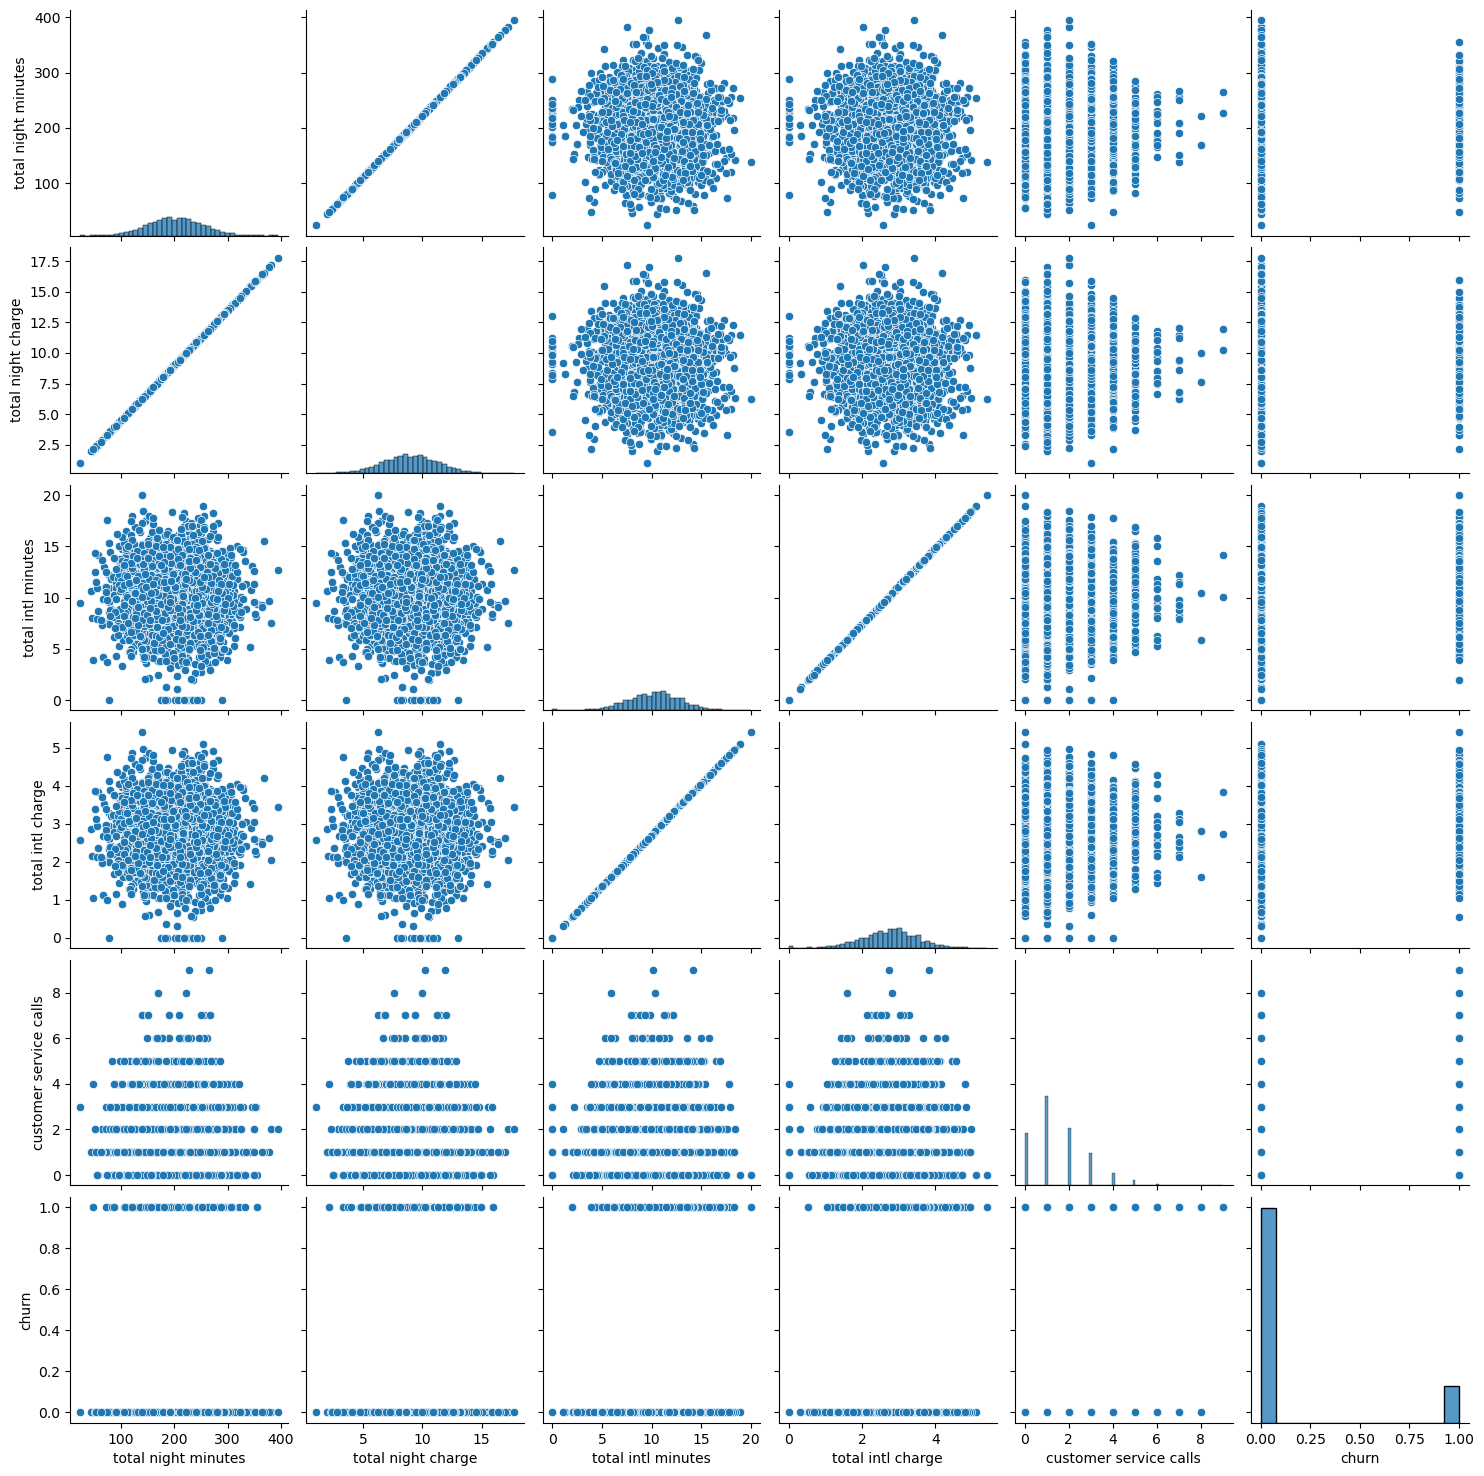

In [278]:
sns.pairplot(data=data[continous_cols[6:]], palette='purple');


Are customers subscribed to a voice mail plan likely to churn?

In [279]:
# Function to take different plans
def plot_churn_vs_plan(data, plan_column):
    data.groupby([plan_column, 'churn']).size().unstack().plot(
        kind='bar', stacked=True, figsize=(12,8))
    plt.show()
    
    # selecting the plan(either international or voice mail plan)
    plan = sum(data[plan_column] == 1)
    total = len(data[plan_column])
    total_plan = (plan / total) * 100

    print('Customers subscribed to the {} : {:.2f}%'.format(plan_column, total_plan))

    # Calculate churned with plan subscribed to
    plan_churn = data[(data['churn'] == True) & (data[plan_column] == 1)]
    total_customers_with_plan = sum(data[plan_column] == 1)
    churned_with_plan = len(plan_churn)
    percentage_churned_with_plan = 100 * churned_with_plan / total_customers_with_plan

    print('Percentage of subscribed customers who churned with {} : {:.2f}%'.format
          (plan_column, percentage_churned_with_plan))

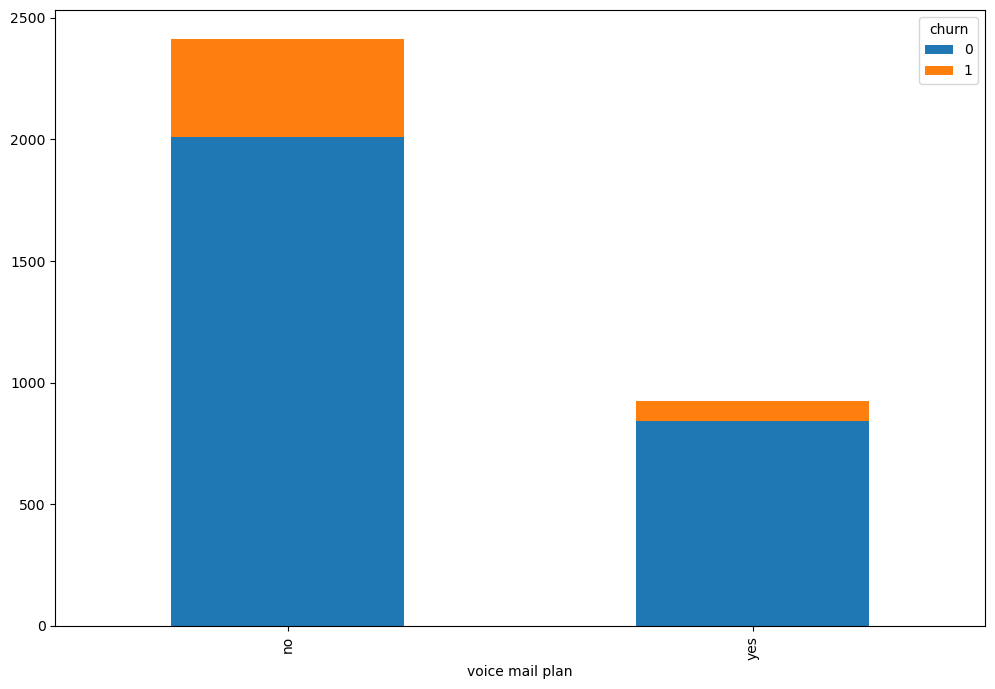

Customers subscribed to the voice mail plan : 0.00%


ZeroDivisionError: division by zero

In [280]:

# Call the function
plot_churn_vs_plan(data, 'voice mail plan')

plot_churn_vs_plan(data,'voice mail plan')

Are customers subscribed to a International plan likely to churn?

In [ ]:
plot_churn_vs_plan(data,'international plan')

No customers with the international plan plan.


<Figure size 800x600 with 0 Axes>

Customers subscribed to the international plan : 9.69%
Percentage of subscribed customers who churned with international plan : 42.41%


## Multivariate Analysis

# Modeling

## Feature Selection.

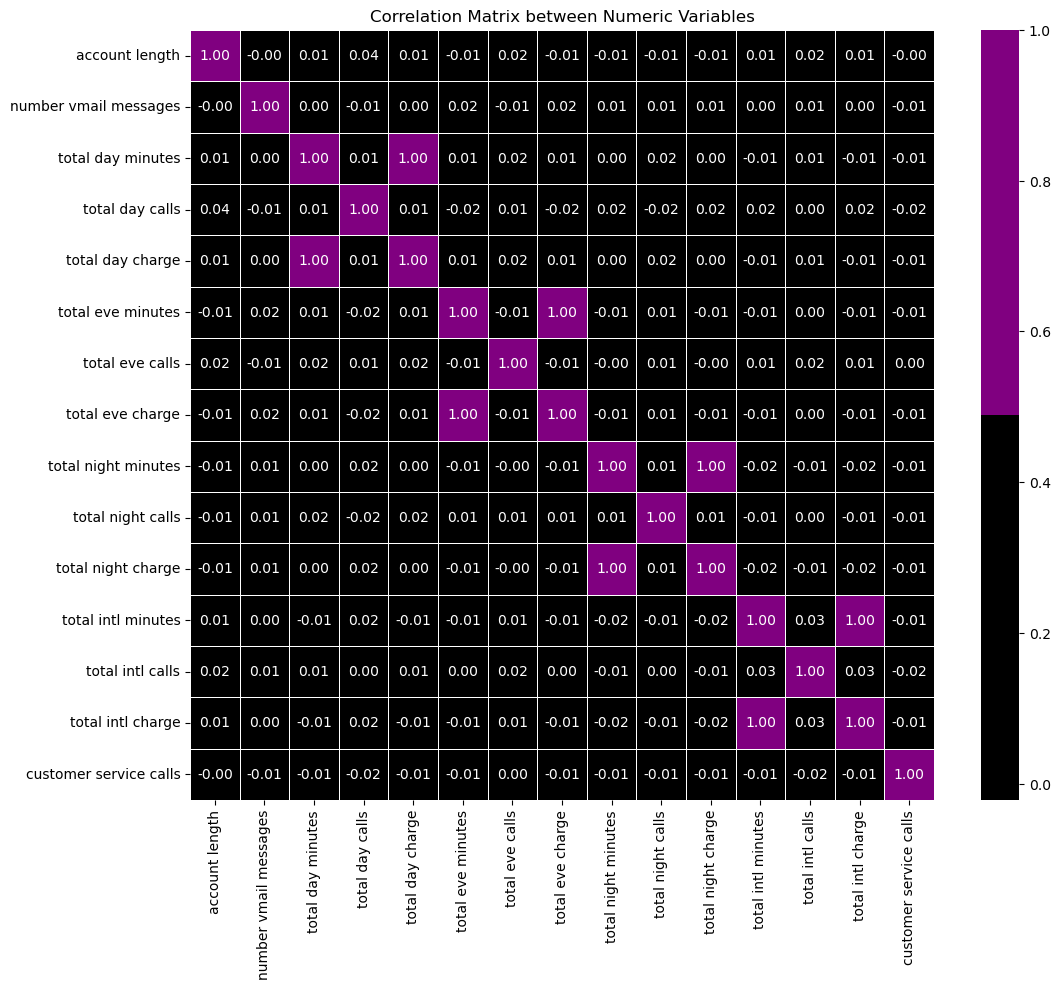

In [ ]:
# Select numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Define custom color palette
custom_palette = sns.color_palette(['black', 'purple'])

# Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap=custom_palette, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Numeric Variables')
plt.show()


In [ ]:
#dropping these columns
frenzy_data = data
frenzy_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
# droping the state column
frenzy_data.drop('state',axis = 1,inplace=True)

In [ ]:
frenzy_data.shape

(3333, 19)

## a). Splitting the data into Train and Test sets

since the dataset contains 3,333 observations will split the dataset to have a test size of 20% and a random state of 42

In [ ]:
y = frenzy_data['churn']
X = frenzy_data.drop('churn',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

## Standardizing and dealing with class imbalances

In [ ]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

# convert X_train and X_test_scaled into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,index=X_test.index, columns=X_test.columns)

ValueError: could not convert string to float: 'no'